In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('gld_price_data.csv')

In [3]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
data.shape

(2290, 6)

In [5]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

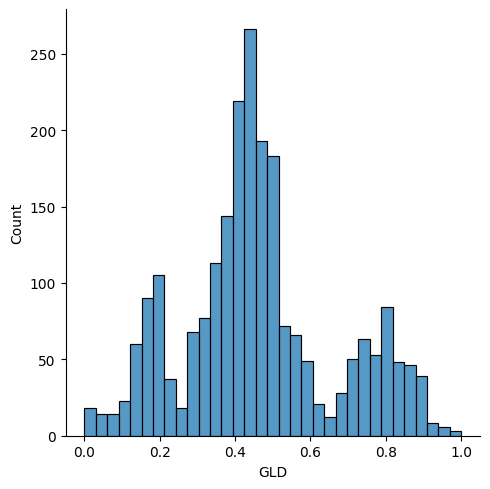

In [23]:
import seaborn as sns
sns.displot(data['GLD'])

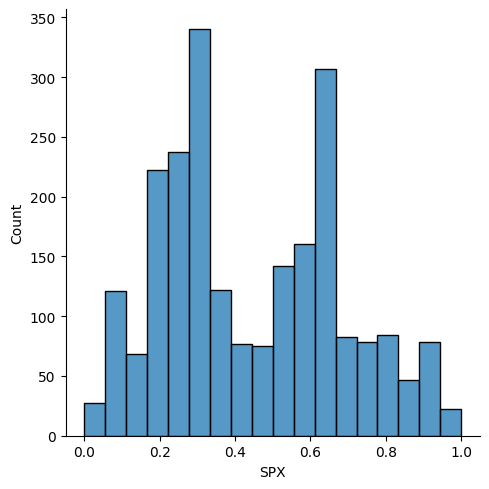

In [24]:
sns.displot(data['SPX'])

<Axes: xlabel='USO', ylabel='Count'>

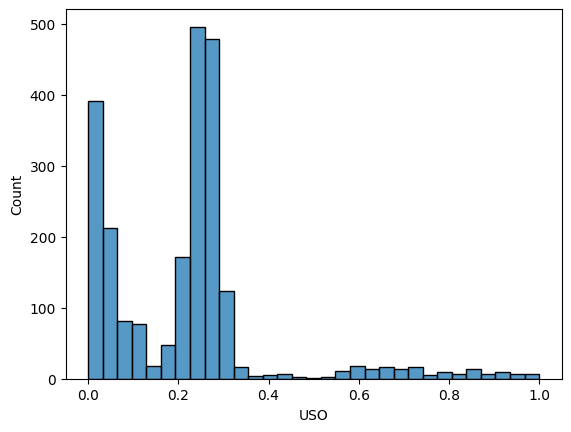

In [25]:
sns.histplot(data['USO'])

<Axes: xlabel='SLV', ylabel='Count'>

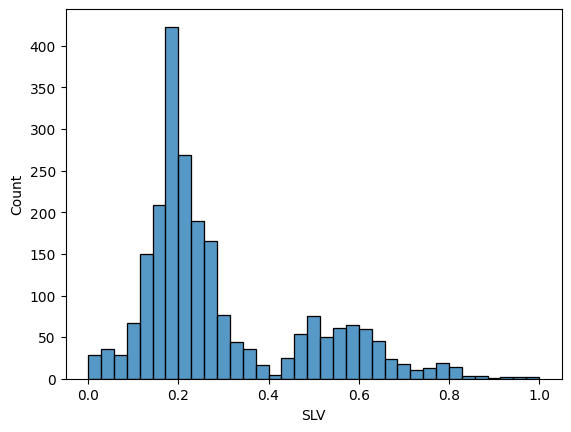

In [26]:
sns.histplot(data['SLV'])

In [8]:
data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [9]:
num = 'SPX GLD USO SLV EUR/USD'.split()

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[num] = scaler.fit_transform(data[num])

In [11]:
x = data.drop(['Date','GLD'], axis = 1)
y = data['GLD']

In [12]:
x.head()

,SPX,USO,SLV,EUR/USD
0,0.350870,0.643809,0.164801,0.772924
1,0.350870,0.642896,0.167535,0.777924
2,0.334693,0.633218,0.164462,0.779713
3,0.336765,0.616691,0.161494,0.766862
4,0.324931,0.621804,0.175475,0.925504


In [13]:
y.head()

,GLD
0,0.129680
1,0.135876
2,0.132036
3,0.128894
4,0.146435


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [15]:
x_train

,SPX,USO,SLV,EUR/USD
486,0.222771,0.288532,0.201770,0.567499
31,0.306628,0.620617,0.210935,0.765632
1754,0.621652,0.025383,0.110128,0.086478
1490,0.540094,0.211286,0.203593,0.431254
1526,0.614481,0.139883,0.195782,0.358102
...,...,...,...,...
1033,0.357194,0.238860,0.643582,0.476599
1731,0.613070,0.046567,0.123405,0.075846
763,0.276355,0.256118,0.664410,0.693085
835,0.246660,0.248722,0.611299,0.619836


In [16]:
x_test

,SPX,USO,SLV,EUR/USD
1255,0.462697,0.264061,0.315803,0.558554
2100,0.796325,0.011961,0.159854,0.193563
711,0.288266,0.311267,0.709971,0.663776
1328,0.529139,0.234934,0.277532,0.576608
53,0.283148,0.678689,0.244754,0.937642
...,...,...,...,...
2085,0.798082,0.014244,0.187191,0.143944
1362,0.546655,0.258766,0.290549,0.623170
828,0.242836,0.231465,0.556626,0.602863
567,0.188013,0.244522,0.225983,0.438336


In [28]:
y_train

,GLD
486,0.329435
31,0.167118
1754,0.266166
1490,0.429531
1526,0.418536
...,...
1033,0.887861
1731,0.292870
763,0.683655
835,0.849812


In [29]:
y_test

,GLD
1255,0.513046
2100,0.398115
711,0.604067
1328,0.444454
53,0.201065
...,...
2085,0.439480
1362,0.516014
828,0.784274
567,0.413125


In [17]:
y.std()

0.20318829356724616

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [19]:
pred = model.predict(x_test)
pred

array([0.47114485, 0.42520101, 0.85466502, 0.44466676, 0.25497142,
       0.64600138, 0.47711944, 0.35027675, 0.62438711, 0.37285631,
       0.3625428 , 0.44818123, 0.20499603, 0.6778498 , 0.45937429,
       0.40232518, 0.17982911, 0.22122402, 0.23271194, 0.42609545,
       0.10125359, 0.41816482, 0.46056749, 0.94614598, 0.93000081,
       0.85823821, 0.40597634, 0.71808906, 0.50218671, 0.38438787,
       0.43245258, 0.35638786, 0.46247765, 0.45148693, 0.29419203,
       0.42946254, 0.08386396, 0.40577945, 0.45341174, 0.8615675 ,
       0.30979302, 0.5962779 , 0.31578916, 0.65774196, 0.6110809 ,
       0.82052886, 0.43920329, 0.6954289 , 0.7001085 , 0.45895901,
       0.40735965, 0.34603426, 0.41185526, 0.36253583, 0.62432205,
       0.40970828, 0.39404386, 0.15584447, 0.64414526, 0.44293667,
       0.21815794, 0.40619307, 0.08776091, 1.10983806, 0.42483535,
       0.46638486, 0.44110763, 0.37348515, 0.77822035, 0.46470381,
       0.4429793 , 0.94234764, 0.39328194, 0.80224939, 0.36668

In [20]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

0.005758766905509694
0.05334001723885212
0.8530125466873726


Our model's accuracy is over 85% which is quite high